## FrozenLake-v1

Here is a [better rendering](https://nbviewer.org/github/facebookresearch/Pearl/blob/main/tutorials/frozen_lake/frozen_lake.ipynb) of this notebook on [nbviewer](https://nbviewer.org/).

This example shows how to use DQN to solve the `FrozenLake-v1` environment from gymnasium. This environment has observations as indices (tabular observation)which is not suitable for learning with a neural network. In what follows, we show how to use Pearl's `OneHotObservationsFromDiscrete` wrapper to convert observations to their one-hot representations.

In [1]:
%load_ext autoreload
%autoreload 2

I0212 225446.596 magics.py:84] %autoreload was called with parameter_s='2'


## Import Modules

In [1]:
from pearl.utils.functional_utils.experimentation.set_seed import set_seed
from pearl.policy_learners.sequential_decision_making.deep_q_learning import DeepQLearning
from pearl.replay_buffers.sequential_decision_making.fifo_off_policy_replay_buffer import FIFOOffPolicyReplayBuffer
from pearl.utils.functional_utils.train_and_eval.online_learning import online_learning
from pearl.pearl_agent import PearlAgent
from pearl.utils.instantiations.environments.gym_environment import GymEnvironment
from pearl.utils.instantiations.environments.environments import (
    OneHotObservationsFromDiscrete,
)
from pearl.utils.instantiations.spaces.discrete import DiscreteSpace
import torch
import matplotlib.pyplot as plt
import numpy as np
from pearl.action_representation_modules.one_hot_action_representation_module import (
    OneHotActionTensorRepresentationModule,
)

set_seed(0)

## Vanilla DQN 

episode 3, step 140, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 4, step 233, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 5, step 333, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 7, step 426, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 8, step 526, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 9, step 626, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 11, step 734, agent=PearlAgent with DeepQLea

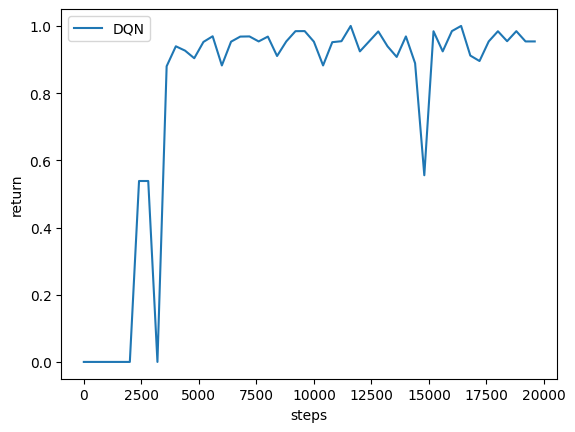

In [2]:
number_of_steps = 20000
record_period = 400

"""
This test is checking if DQN will eventually solve FrozenLake-v1
whose observations need to be wrapped in a one-hot representation.
"""
env = OneHotObservationsFromDiscrete(
    GymEnvironment(
        "FrozenLake-v1", is_slippery=False, map_name="4x4",
    )
)

action_representation_module = OneHotActionTensorRepresentationModule(
    max_number_actions= env.action_space.n,
)

assert isinstance(env.action_space, DiscreteSpace)
state_dim = env.observation_space.n
agent = PearlAgent(
    policy_learner=DeepQLearning(
        state_dim=state_dim,
        action_space=env.action_space,
        hidden_dims=[64, 64],
        training_rounds=1,
        action_representation_module=action_representation_module
    ),
    replay_buffer=FIFOOffPolicyReplayBuffer(1000),
)

info = online_learning(
    agent=agent,
    env=env,
    number_of_steps=number_of_steps,
    print_every_x_steps=100,
    record_period=record_period,
    learn_after_episode=False,
)
torch.save(info["return"], "DQN-return.pt")
plt.plot(record_period * np.arange(len(info["return"])), info["return"], label="DQN")
plt.xlabel("steps")
plt.ylabel("return")
plt.legend()
plt.show()